# 图片教程

这是一个关于使用 Matplotlib 绘制图片的简短教程。

## 启动命令

首先，让我们启动 IPython。它是标准 Python 提示符的一个极好的增强版，并且与 Matplotlib 配合得尤其出色。直接在 shell 中或通过 Jupyter Notebook（IPython 作为运行内核）启动 IPython。

启动 IPython 后，我们现在需要连接到一个 GUI 事件循环。这告诉 IPython 在哪里（以及如何）显示绘图。要连接到一个 GUI 循环，请在您的 IPython 提示符下执行 **%matplotlib** 魔法命令。关于这个操作的更多细节可以在 [IPython 关于 GUI 事件循环的文档](https://ipython.readthedocs.io/en/stable/interactive/reference.html#gui-event-loop-support) 中找到。

如果您使用的是 Jupyter Notebook，同样的命令也可用，但人们通常会为 %matplotlib 魔法命令使用一个特定的参数：

```ipython
In [1]: %matplotlib inline
```

这将启用内联绘图，其中绘图图形将出现在您的笔记本中。这对交互性有重要意义。对于内联绘图，输出绘图的单元格下方的命令不会影响绘图。例如，无法从创建绘图的单元格下方的单元格更改颜色图。然而，对于其他后端（如 Qt），它们会打开一个单独的窗口，创建绘图的那些单元格下方的单元格将改变绘图——它是一个内存中的实时对象。

本教程将使用 Matplotlib 的隐式绘图接口，pyplot。这个接口维护全局状态，并且非常适合快速轻松地试验各种绘图设置。另一种选择是显式接口，更适合大型应用开发。现在，让我们继续隐式方法：

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

## 将图像数据导入 Numpy 数组

Matplotlib 依赖 Pillow 库来加载图像数据。

下面是我们要处理的图像：

![](images/stinkbug.png)

这是 24 位 RGB PNG 图像（R、G、B各占8位）。根据您获取数据的地点，您最有可能遇到的其他类型的图像是允许透明度的 RGBA 图像，或者单通道灰度（亮度）图像。下载 [stinkbug.png](https://raw.githubusercontent.com/matplotlib/matplotlib/main/doc/_static/stinkbug.png) 到您的计算机以继续本教程。

我们使用 Pillow 打开图像（使用 {func}`PIL.Image.open`），并立即将 {class}`PIL.Image.Image` 对象转换为8位（``dtype=uint8``）numpy数组。

In [2]:
img = np.asarray(Image.open('images/stinkbug.png'))
print(repr(img))

array([[[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       ...,

       [[112, 112, 112],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [115, 115, 115]],

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [114, 114, 114]],

       [[113, 113, 113],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [113, 113, 113]]

每个内部列表代表一个像素。在这里，对于RGB图像，有3个值。由于它是一个黑白图像，R、G和B都相似。RGBA（其中A是透明度）每个内部列表有4个值，而简单的亮度图像只有一个值（因此只是一个2D数组，而不是3D数组）。对于RGB和RGBA图像，Matplotlib支持float32和uint8数据类型。对于灰度图像，Matplotlib仅支持float32。如果您的数组数据不符合这些描述之一，您需要重新缩放它。

## 将 {mod}`numpy` 数组绘制为图像

所以，您的数据已经存储在一个numpy数组中（无论是通过导入还是生成）。让我们将其渲染出来。在Matplotlib中，这是使用{func}`~matplotlib.pyplot.imshow`函数完成的。在这里，我们将获取绘图对象。这个对象让您可以轻松地从提示符操作绘图。

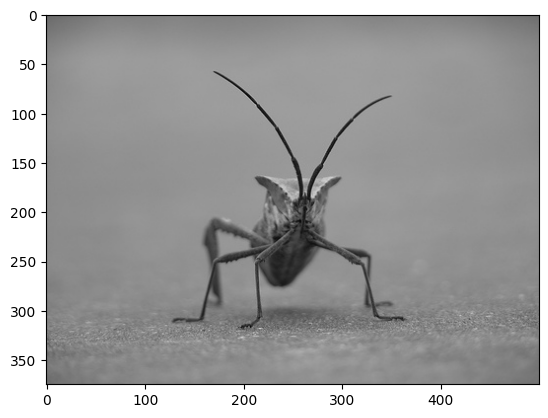

In [3]:
imgplot = plt.imshow(img)

您也可以绘制任何 {mod}`numpy` 数组。

### 对图像绘图应用伪彩色方案

伪彩色可以是一个有用的工具，用于增强对比度并使您的数据更易于可视化。这在通过投影仪展示数据时尤其有用——它们的对比度通常相当差。

伪彩色只与单通道、灰度、亮度图像相关。我们目前有一个RGB图像。由于R、G和B都相似（如上所述或在您的数据中查看），我们可以仅使用数组切片选择我们数据的一个通道（您可以在[Numpy教程](https://numpy.org/doc/stable/user/quickstart.html#indexing-slicing-and-iterating)中阅读更多）：

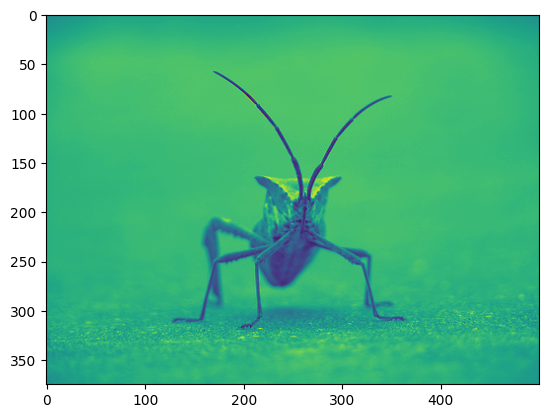

In [4]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)

现在，对于亮度（2D，无颜色）图像，将应用默认的颜色图（也称为查找表，LUT）。默认的是 `viridis`。还有许多其他选项可供选择。

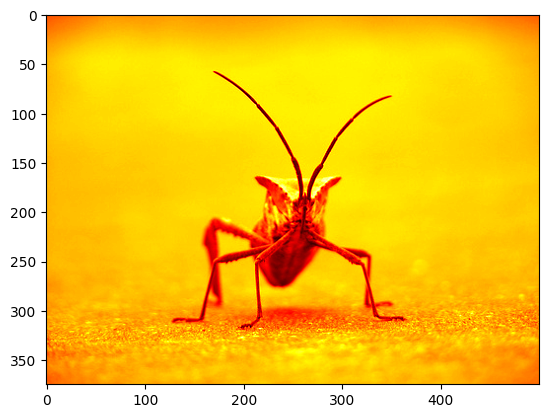

In [5]:
plt.imshow(lum_img, cmap="hot")

注意，您也可以使用 {meth}`~matplotlib.cm.ScalarMappable.set_cmap` 方法在现有的绘图对象上更改颜色图：

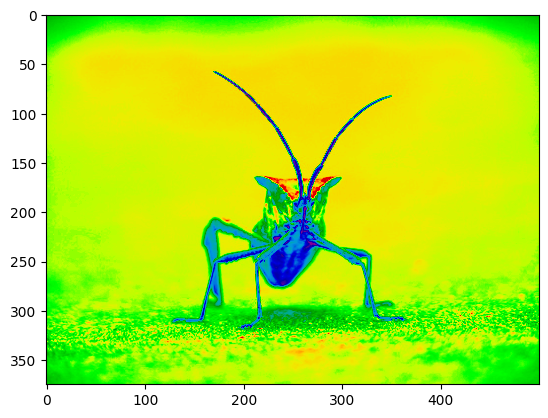

In [6]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

```{note}
:class: alert alert-info
然而，请记住，在带有内联后端的 Jupyter Notebook 中，您无法对已经渲染的绘图进行更改。如果您在单元格中创建了 `imgplot`，则不能在稍后的单元格中调用 {meth}`~matplotlib.cm.ScalarMappable.set_cmap` 并期望之前的绘图会发生变化。确保您将这些命令一起输入到单元格中。`plt` 命令不会更改之前单元格中的绘图。
```

还有许多其他颜色图方案可供选择。

### 颜色标尺参考

了解一个颜色代表的值是很有帮助的。我们可以通过为您的图形添加颜色条来实现：

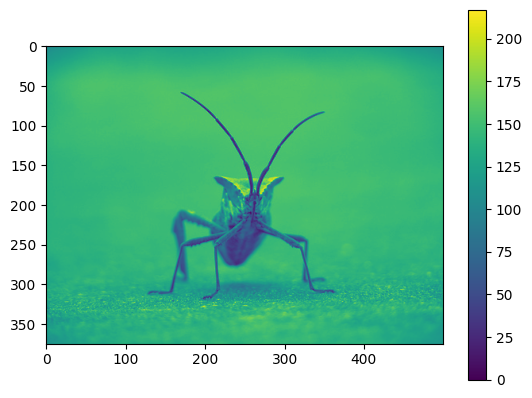

In [7]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

### 检查特定数据范围

有时您可能希望增强图像中的对比度，或在牺牲颜色变化不大或不重要的细节的同时扩展特定区域的对比度。寻找有趣区域的一个好工具是直方图。要创建图像数据的直方图，我们使用{func}`~matplotlib.pyplot.hist`函数。

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

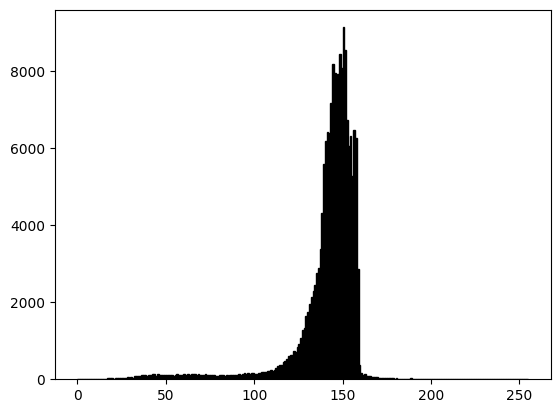

In [8]:
plt.hist(lum_img.ravel(), bins=range(256), fc='k', ec='k')

通常，图像中“有趣”的部分位于峰值附近，通过裁剪峰值以上和/或以下区域可以获得额外的对比度。在我们的直方图中，看起来高端（图像中没有太多白色物体）并没有太多有用的信息。让我们调整上限，以便我们有效地“放大”直方图的一部分。我们可以通过在``imshow``调用中传递*clim*关键字参数来实现这一点。

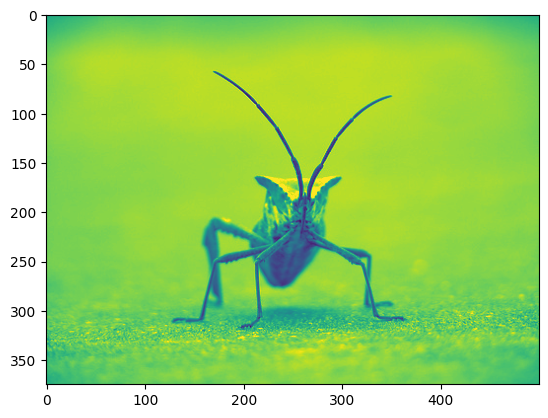

In [9]:
plt.imshow(lum_img, clim=(0, 175))

这也可以通过调用返回的图像绘图对象的 {meth}`~matplotlib.cm.ScalarMappable.set_clim` 方法来实现，但在使用Jupyter Notebook时，请确保在与绘图命令相同的单元格中进行此操作——它不会更改之前单元格中的绘图。

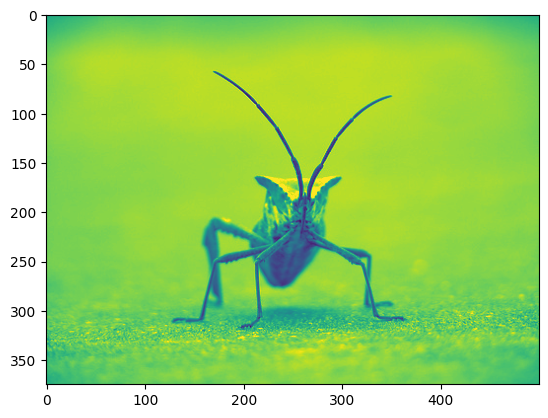

In [10]:
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0, 175)

### 数组插值方案

插值通过不同的数学方案计算像素“应该”具有的颜色或值。一个常见的例子是当你调整图像大小时。像素数量会发生变化，但你希望保留相同的信息。由于像素是离散的，存在缺失的空间。插值就是用来填补这个空间的方法。这就是为什么当你放大图像时，有时图像会出现像素化效果。当原始图像与扩展图像之间的差异更大时，这种效果更加明显。让我们缩小我们的图像。我们实际上是在丢弃像素，只保留一些选定的像素。现在当我们绘制它时，这些数据被放大到屏幕上的大小。旧的像素已经不存在了，计算机必须绘制像素来填补那个空间。

我们将使用我们用来加载图像的Pillow库来调整图像大小。

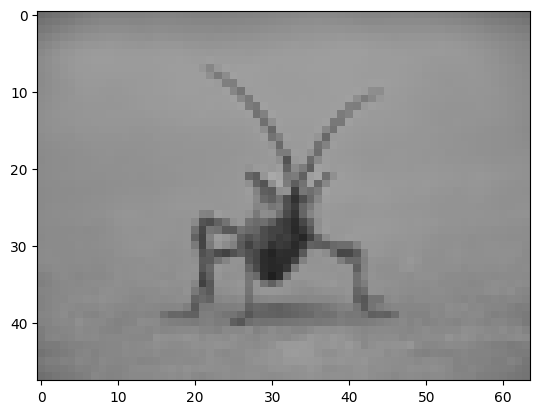

In [11]:
img = Image.open('images/stinkbug.png')
img.thumbnail((64, 64))  # resizes image in-place
imgplot = plt.imshow(img)

在这里我们使用默认的插值方式（“nearest”），因为我们没有给 {func}`~matplotlib.pyplot.imshow` 提供任何插值参数。

让我们尝试一些其他的。这是“bilinear”：

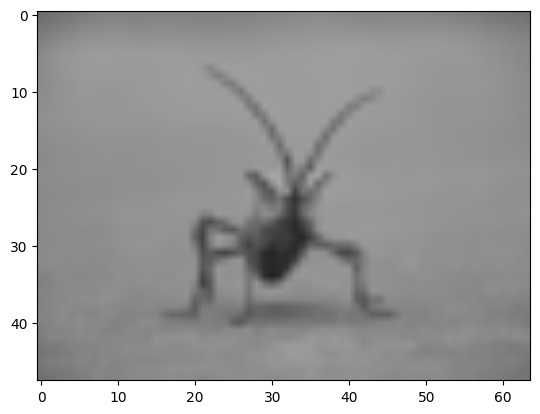

In [12]:
imgplot = plt.imshow(img, interpolation="bilinear")

和 bicubic：



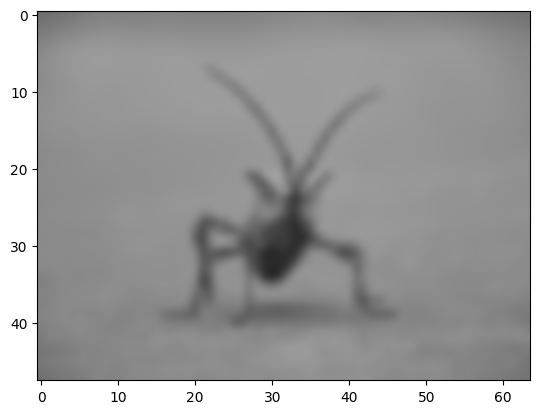

In [13]:
imgplot = plt.imshow(img, interpolation="bicubic")

双三次插值通常用于放大照片——人们倾向于选择模糊而不是像素化。